### Importación de datos



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



 En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [8]:
#en facturacion queda por cada tienda la suma de Precio que es lo generado, sin tener en cuenta el gasto de envio.
facturacion = {
    'tienda': tienda['Precio'].sum(),
    'tienda1': tienda2['Precio'].sum(),
    'tienda2': tienda3['Precio'].sum(),
    'tienda3': tienda4['Precio'].sum(),
}
#resumen_df es un dataframe con el nombre de cada tienda y la columna de ventas
resumen_df = pd.DataFrame.from_dict(facturacion, orient='index', columns=['facturacion_ventas'])
#aplicamos un lambda al resumen para ver los datos de manera mas clara, ya que sino se ve como notacion cientifica.
resumen_facturacion = resumen_df.map(lambda x: f"{x:,.0f}")

print(resumen_facturacion)

        facturacion_ventas
tienda       1,150,880,400
tienda1      1,116,343,500
tienda2      1,098,019,600
tienda3      1,038,375,700


# 2. Ventas por categoría

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda.
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [ ]:
#agrupar por categoria y sumar por cada tienda.

In [14]:
#funcion que cuenta por cada Categoria del Producto, se renombra a Categoria, a la columna que se utilizo para contar se la renombra Cantidad y se le agrega el nombre de la tienda
def contar_por_categoria(df, nombre_tienda):
    return df['Categoría del Producto'].value_counts().rename_axis('Categoria').reset_index(name='Cantidad').assign(tienda=nombre_tienda)
#se llama por cada tienda a la funcion
resumen_tienda = contar_por_categoria(tienda, 'tienda')
resumen_tienda2 = contar_por_categoria(tienda2, 'tienda1')
resumen_tienda3 = contar_por_categoria(tienda3, 'tienda2')
resumen_tienda4 = contar_por_categoria(tienda4, 'tienda3')

#se combinan los resultados
resumen_categorias = pd.concat([resumen_tienda, resumen_tienda2, resumen_tienda3, resumen_tienda4], ignore_index=True)
#se re-organiza el df para que tenga el formato: tienda, Categoria y Cantidad.
resumen_categorias = resumen_categorias[['tienda', 'Categoria', 'Cantidad']]
print(resumen_categorias)

     tienda                Categoria  Cantidad
0    tienda                  Muebles       465
1    tienda             Electrónicos       448
2    tienda                 Juguetes       324
3    tienda        Electrodomésticos       312
4    tienda     Deportes y diversión       284
5    tienda   Instrumentos musicales       182
6    tienda                   Libros       173
7    tienda  Artículos para el hogar       171
8   tienda1                  Muebles       442
9   tienda1             Electrónicos       422
10  tienda1                 Juguetes       313
11  tienda1        Electrodomésticos       305
12  tienda1     Deportes y diversión       275
13  tienda1   Instrumentos musicales       224
14  tienda1                   Libros       197
15  tienda1  Artículos para el hogar       181
16  tienda2                  Muebles       499
17  tienda2             Electrónicos       451
18  tienda2                 Juguetes       315
19  tienda2        Electrodomésticos       278
20  tienda2  

# 3. Calificación promedio de la tienda


En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [ ]:
#voy a necesitar sumar la calificacion de cada tienda, contar la cantidad de estas,
# y despues hacer la suma total de calificaciones/la cantidad de calificaciones, sacando un promedio

In [4]:
#Utilizo 2 df, uno donde esta la suma de Calificacion y otro para contabilizar estas.
def resumen_calificacion(df, nombre_tienda):
    suma = df['Calificación'].sum()
    cantidad = df['Calificación'].count()
    promedio = suma / cantidad if cantidad != 0 else 0

    return pd.DataFrame({
        'tienda': [nombre_tienda],
        'suma_calificacion': [suma],
        'cantidad_calificaciones': [cantidad],
        'promedio_calificacion': [promedio]
    })
resumen_tienda= resumen_calificacion(tienda, 'tienda')
resumen_tienda2= resumen_calificacion(tienda2, 'tienda1')
resumen_tienda3= resumen_calificacion(tienda3, 'tienda2')
resumen_tienda4= resumen_calificacion(tienda4, 'tienda3')

resumen_calificaciones = pd.concat([resumen_tienda, resumen_tienda2, resumen_tienda3, resumen_tienda4], ignore_index=True)
resumen_calificaciones = resumen_calificaciones[['tienda', 'suma_calificacion', 'cantidad_calificaciones', 'promedio_calificacion']]
resumen_calificaciones = resumen_calificaciones.sort_values(by='promedio_calificacion', ascending=False)
print(resumen_calificaciones)

    tienda  suma_calificacion  cantidad_calificaciones  promedio_calificacion
2  tienda2               9550                     2359               4.048326
1  tienda1               9524                     2359               4.037304
3  tienda3               9422                     2358               3.995759
0   tienda               9381                     2359               3.976685


# 4. Productos más y menos vendidos

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [ ]:
#por cada tienda voy a tener que contar que producto se vendio mas veces y cual menos.
#luego informar por cada tienda el producto mas y menos vendido

In [ ]:
def producto_mas_vendido(df, nombre_tienda):
    producto_mas_vendido = df['Producto'].value_counts().idxmax()
    cantidad_mas_vendida = df['Producto'].value_counts().max()
    producto_menos_vendido= df['Producto'].value_counts().idxmin()
    cantidad_menos_vendida = df['Producto'].value_counts().min()
    return pd.DataFrame({
        'tienda': [nombre_tienda],
        'producto_mas_vendido': [producto_mas_vendido],
        'cantidad_mas_vendida': [cantidad_mas_vendida],
        'producto_menos_vendido': [producto_menos_vendido],
        'cantidad_menos_vendida': [cantidad_menos_vendida]
    })
resultado_tienda = producto_mas_vendido(tienda, 'tienda')
resultado_tienda2 = producto_mas_vendido(tienda2, 'tienda1')
resultado_tienda3 = producto_mas_vendido(tienda3, 'tienda2')
resultado_tienda4 = producto_mas_vendido(tienda4, 'tienda3')

resultado_final = pd.concat([resultado_tienda, resultado_tienda2, resultado_tienda3, resultado_tienda4], ignore_index=True)
resultado_final = resultado_final[['tienda', 'producto_mas_vendido', 'cantidad_mas_vendida', 'producto_menos_vendido', 'cantidad_menos_vendida']]

print(resultado_final)

    tienda       producto_mas_vendido  cantidad_mas_vendida  \
0   tienda                 Microondas                    60   
1  tienda1  Iniciando en programación                    65   
2  tienda2              Kit de bancas                    57   
3  tienda3                   Cama box                    62   

      producto_menos_vendido  cantidad_menos_vendida  
0  Auriculares con micrófono                      33  
1              Juego de mesa                      32  
2    Bloques de construcción                      35  
3         Guitarra eléctrica                      33  


# 5. Envío promedio por tienda

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [ ]:
#sumar el costo de envio por cada tienda, a su vez contar la cantidad de envios hechos, para luego hacer el promedio

In [2]:
def resumen_envio(df, nombre_tienda):
    suma_envio = df['Costo de envío'].sum()
    cantidad_envios = df['Costo de envío'].count()
    promedio_envio = suma_envio / cantidad_envios if cantidad_envios != 0 else 0
    return pd.DataFrame({
        'tienda': [nombre_tienda],
        'suma_envio': [suma_envio],
        'cantidad_envios': [cantidad_envios],
        'promedio_envio': [promedio_envio]
    })
resumen_tienda = resumen_envio(tienda, 'tienda')
resumen_tienda2 = resumen_envio(tienda2, 'tienda1')
resumen_tienda3 = resumen_envio(tienda3, 'tienda2')
resumen_tienda4 = resumen_envio(tienda4, 'tienda3')

resumen_envios = pd.concat([resumen_tienda, resumen_tienda2, resumen_tienda3, resumen_tienda4], ignore_index=True)

print(resumen_envios)

    tienda  suma_envio  cantidad_envios  promedio_envio
0   tienda  61377900.0             2359    26018.609580
1  tienda1  59485100.0             2359    25216.235693
2  tienda2  58516600.0             2359    24805.680373
3  tienda3  55317400.0             2358    23459.457167


# 6. Graficos y visualizacion de datos.

Promedio de calificacion por tienda, en barras verticales.


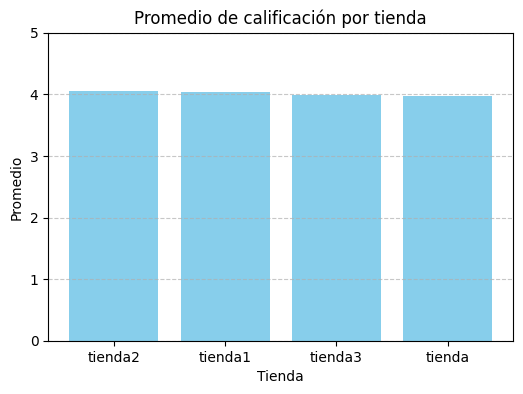

In [24]:
plt.figure(figsize=(6, 4))
plt.bar(resumen_calificaciones['tienda'], resumen_calificaciones['promedio_calificacion'], color='skyblue')
plt.title('Promedio de calificación por tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Facturacion total por tienda, en barras verticales.

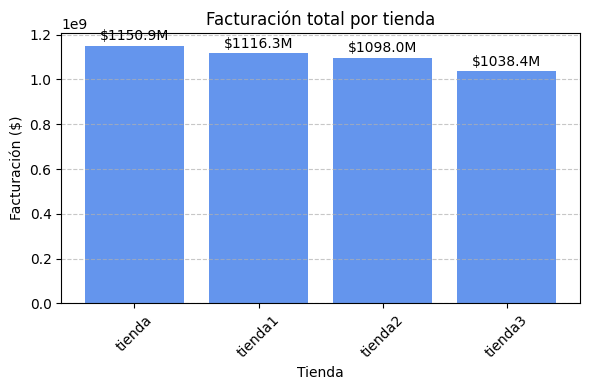

In [23]:
df_plot = resumen_df.reset_index().rename(columns={'index': 'tienda'})

plt.figure(figsize=(6, 4))
plt.bar(df_plot['tienda'], df_plot['facturacion_ventas'], color='cornflowerblue')

plt.title('Facturación total por tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(df_plot['facturacion_ventas']):
    plt.text(i, v + 1e7, f"${v/1e6:.1f}M", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Distribucion de ventas por categoria de tienda en especifico.

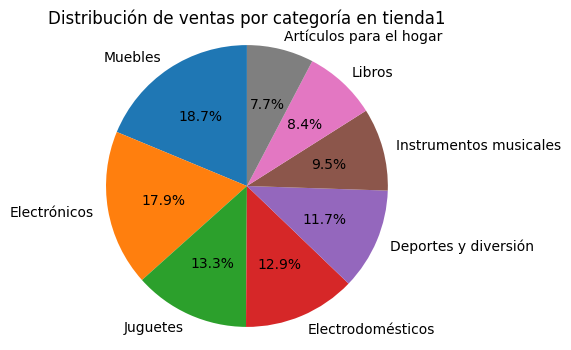

In [22]:
tienda_elegida = 'tienda1'  # se puede cambiar por tienda, tienda2, etc.
datos_tienda = resumen_categorias[resumen_categorias['tienda'] == tienda_elegida]

plt.figure(figsize=(4, 4))
plt.pie(datos_tienda['Cantidad'], labels=datos_tienda['Categoria'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribución de ventas por categoría en {tienda_elegida}')
plt.axis('equal')
plt.show()

Distribucion de ventas por categoria, apilandolas por tienda.

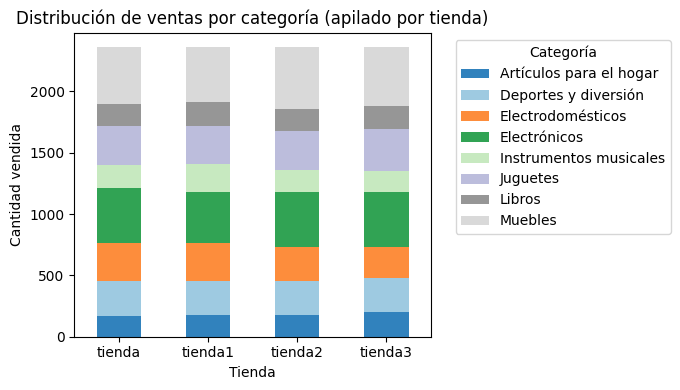

In [21]:
pivot = resumen_categorias.pivot(index='tienda', columns='Categoria', values='Cantidad').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(7, 4), colormap='tab20c')

plt.title('Distribución de ventas por categoría (apilado por tienda)')
plt.xlabel('Tienda')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Costos promedio de envio por tienda en barras horizontales.

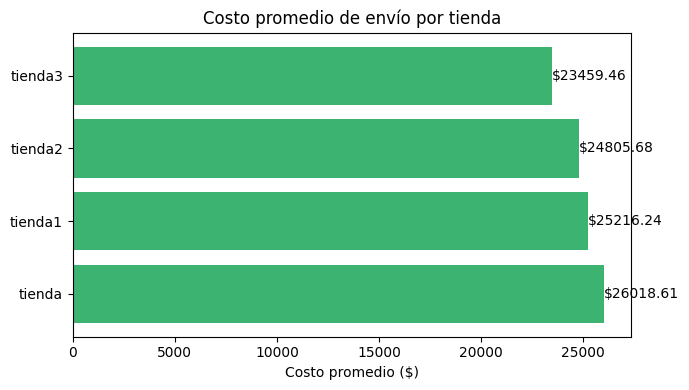

In [20]:
plt.figure(figsize=(7, 4))
plt.barh(resumen_envios['tienda'], resumen_envios['promedio_envio'], color='mediumseagreen')

plt.title('Costo promedio de envío por tienda')
plt.xlabel('Costo promedio ($)')

# Etiquetas al final de cada barra
for i, v in enumerate(resumen_envios['promedio_envio']):
    plt.text(v + 0.5, i, f"${v:.2f}", va='center')

plt.tight_layout()
plt.show()

# 7. Resumen para Sr.Juan


Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

Los ingresos totales de las tiendas.

Las categorías de productos más y menos vendidas.

Las calificaciones promedio de los clientes por tienda.

Los productos más y menos vendidos.

El coste de envío promedio para cada tienda.

En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.




##Recomendacion en base a los datos conseguidos luego del analisis:



**El propósito de este informe es evaluar el rendimiento de cuatro tiendas (tienda, tienda1, tienda2 y tienda3) a partir de tres métricas clave: ingresos totales por ventas, calificación promedio de los usuarios y costo promedio de envío. El objetivo es identificar, de forma objetiva y basada en datos, cuál de las tiendas resulta menos rentable y debería ser considerada para su desactivación o venta.**

En este análisis consideramos tanto el impacto financiero, como la satisfacción del cliente y la eficiencia operativa.

Tras el análisis de las métricas principales, se recomienda considerar la venta o cierre de la tienda3. Aunque presenta un costo de envío eficiente, este aspecto no compensa sus debilidades:

Es la tienda con menores ingresos totales, lo que afecta directamente a la rentabilidad general.

Tiene una calificación por debajo del promedio, lo que indica que no destaca tampoco en experiencia del cliente.

No lidera en ninguna métrica, y su mejor punto (costo de envío) no basta para justificar su mantenimiento operativo.

En cambio, otras tiendas como tienda2 logran combinar eficiencia, buena calificación y facturación sólida.


Y en resumen Tienda3 parece ser la menos rentable en conjunto:
Es la que menos factura.

Tiene una calificación apenas por encima de la peor.

Aunque el costo de envío es el más bajo, eso no compensa la baja facturación ni mejora su calificacion significativamente.






Datos que tuvieron mayor relevancia:


  Ingresos totales de las tiendas:
  tienda3 la que menos genero.
          facturacion_ventas
  tienda       1,150,880,400
  tienda1      1,116,343,500
  tienda2      1,098,019,600
  tienda3      1,038,375,700

  Calificacion promedio:
  tienda y tienda3
      tienda  suma_calificacion  cantidad_calificaciones  promedio_calificacion
  2  tienda2               9550                     2359               4.048326
  1  tienda1               9524                     2359               4.037304
  3  tienda3               9422                     2358               3.995759
  0   tienda               9381                     2359               3.976685

  Coste de envio:
  tienda3 mas barato, tienda mas caro
      tienda  suma_envio  cantidad_envios  promedio_envio
  0   tienda  61377900.0             2359    26018.609580
  1  tienda1  59485100.0             2359    25216.235693
  2  tienda2  58516600.0             2359    24805.680373
  3  tienda3  55317400.0             2358    23459.457167
Tienda	Ingresos	Calificación	Costo envío	Comentario
tienda	🟢 Alto	🔴 Bajo	     🔴 Alto	Genera más, pero tiene la peor            
                                  percepción y costo elevado.
tienda1	🟢 Medio	🟢 Bueno	 🟡 Medio	Balanceada, buena calificación.
tienda2	🟡 Medio	🟢 Mejor	 🟢 Bajo	Muy eficiente.
tienda3	🔴 Bajo	🟡 Regular	 🟢 Más bajo	Genera poco, calificación media-baja.
